# Important Methods for Time Series in Pandas

In [18]:
import pandas as pd 
import numpy as np

## resampling method

In [3]:
fb=pd.read_csv(r'C:\Users\Lenovo\Downloads\sales.csv', 
               parse_dates=["OrderDate"], 
               index_col="OrderDate")

In [4]:
fb.head()

,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
OrderDate,,,,,,,
2017-01-01,12/13/2003,SO61285,529,23791,1,2,2
2017-01-01,9/24/2003,SO61285,214,23791,1,3,1
2017-01-01,9/4/2003,SO61285,540,23791,1,1,1
2017-01-01,9/28/2003,SO61301,529,16747,1,2,2
2017-01-01,10/21/2003,SO61301,377,16747,1,1,1


In [6]:
fb.resample("M").mean()

,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
OrderDate,,,,,
2017-01-31,447.804319,18709.343722,6.237311,1.991095,1.562778
2017-02-28,446.452555,18954.551095,6.210995,1.982208,1.557482
2017-03-31,444.995810,19015.514142,6.241567,1.947622,1.535093
2017-04-30,447.928400,19271.739069,6.227437,1.985560,1.540313
2017-05-31,445.547821,19144.370384,6.100628,1.979690,1.513848
2017-06-30,446.209945,19500.349908,6.239595,2.018785,1.521179


In [7]:
%matplotlib inline

<AxesSubplot:xlabel='OrderDate'>

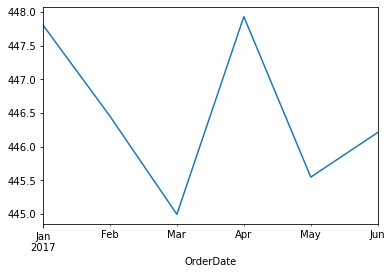

In [9]:
fb.ProductKey.resample("M").mean().plot()

<AxesSubplot:xlabel='OrderDate'>

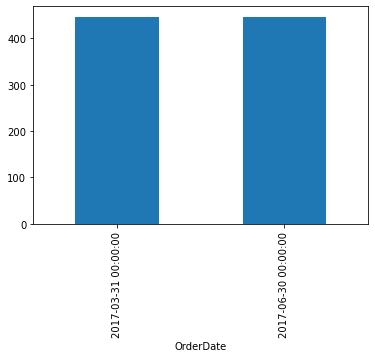

In [10]:
fb.ProductKey.resample("Q").mean().plot(
    kind="bar")

## Shifting

In [21]:
fb1=pd.DataFrame(fb.ProductKey["2017-03"])

In [22]:
fb1.head()

,ProductKey
OrderDate,
2017-03-01,478
2017-03-01,477
2017-03-01,528
2017-03-01,537
2017-03-01,215


In [23]:
fb1.shift(2)

,ProductKey
OrderDate,
2017-03-01,NaN
2017-03-01,NaN
2017-03-01,478.0
2017-03-01,477.0
2017-03-01,528.0
...,...
2017-03-31,484.0
2017-03-31,529.0
2017-03-31,539.0


In [24]:
fb1.shift(-2)

,ProductKey
OrderDate,
2017-03-01,528.0
2017-03-01,537.0
2017-03-01,215.0
2017-03-01,576.0
2017-03-01,479.0
...,...
2017-03-31,214.0
2017-03-31,381.0
2017-03-31,488.0


In [40]:
fb1["One Day Difference"]=fb1[
    "ProductKey"]-fb1["Previous Price"]

In [41]:
fb1.head()

,ProductKey,Previous Price,One Day Difference,Percentage Change
OrderDate,,,,
2017-03-01,478,NaN,NaN,NaN
2017-03-01,477,478.0,-1.0,-0.209205
2017-03-01,528,477.0,51.0,10.691824
2017-03-01,537,528.0,9.0,1.704545
2017-03-01,215,537.0,-322.0,-59.962756


In [49]:
fb1["Percentage Change"]=(
    fb1["ProductKey"]-fb1["Previous Price"])*100/fb1["Previous Price"]

In [50]:
fb2=fb1[["ProductKey"]]

In [51]:
fb2.head()

,ProductKey
OrderDate,
2017-03-01,478
2017-03-01,477
2017-03-01,528
2017-03-01,537
2017-03-01,215


In [52]:
fb2.index

DatetimeIndex(['2017-03-01', '2017-03-01', '2017-03-01', '2017-03-01',
               '2017-03-01', '2017-03-01', '2017-03-01', '2017-03-01',
               '2017-03-01', '2017-03-01',
               ...
               '2017-03-31', '2017-03-31', '2017-03-31', '2017-03-31',
               '2017-03-31', '2017-03-31', '2017-03-31', '2017-03-31',
               '2017-03-31', '2017-03-31'],
              dtype='datetime64[ns]', name='OrderDate', length=4773, freq=None)

In [62]:
fb2.index

DatetimeIndex(['2017-03-01', '2017-03-01', '2017-03-01', '2017-03-01',
               '2017-03-01', '2017-03-01', '2017-03-01', '2017-03-01',
               '2017-03-01', '2017-03-01',
               ...
               '2017-03-31', '2017-03-31', '2017-03-31', '2017-03-31',
               '2017-03-31', '2017-03-31', '2017-03-31', '2017-03-31',
               '2017-03-31', '2017-03-31'],
              dtype='datetime64[ns]', name='OrderDate', length=4773, freq=None)

## Moving Window Functions

<AxesSubplot:xlabel='OrderDate'>

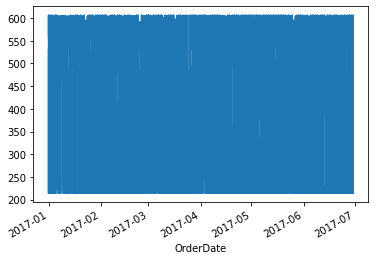

In [65]:
fb.ProductKey.plot()

<AxesSubplot:xlabel='OrderDate'>

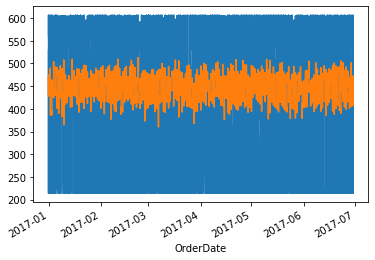

In [66]:
fb.ProductKey.plot()
fb.ProductKey.rolling(30).mean().plot()

## Time Zone Handling

In [67]:
import pytz

In [76]:
pytz.timezone("Turkey")

<DstTzInfo 'Turkey' LMT+1:56:00 STD>

In [78]:
pytz.timezone("America/New_York")

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [79]:
pytz.common_timezones[-7:]

['US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [80]:
x=pd.date_range("12/9/2009 9:30", 
                periods=6, freq="D")

In [81]:
ts=pd.Series(np.random.randn(len(x)), 
             index=x)

In [82]:
ts

2009-12-09 09:30:00    2.777248
2009-12-10 09:30:00   -1.013149
2009-12-11 09:30:00    0.844412
2009-12-12 09:30:00    0.433894
2009-12-13 09:30:00    0.110449
2009-12-14 09:30:00    0.661003
Freq: D, dtype: float64

In [83]:
print(ts.index.tz)

None


In [84]:
ts_utc=ts.tz_localize("UTC")
ts_utc

2009-12-09 09:30:00+00:00    2.777248
2009-12-10 09:30:00+00:00   -1.013149
2009-12-11 09:30:00+00:00    0.844412
2009-12-12 09:30:00+00:00    0.433894
2009-12-13 09:30:00+00:00    0.110449
2009-12-14 09:30:00+00:00    0.661003
Freq: D, dtype: float64

In [85]:
ts_utc.tz_convert("US/Hawaii")

2009-12-08 23:30:00-10:00    2.777248
2009-12-09 23:30:00-10:00   -1.013149
2009-12-10 23:30:00-10:00    0.844412
2009-12-11 23:30:00-10:00    0.433894
2009-12-12 23:30:00-10:00    0.110449
2009-12-13 23:30:00-10:00    0.661003
Freq: D, dtype: float64

In [86]:
zstamp=pd.Timestamp("2019-06-26 05:00")
zstamp

Timestamp('2019-06-26 05:00:00')

In [87]:
zstamp_utc=zstamp.tz_localize("utc")
zstamp_utc

Timestamp('2019-06-26 05:00:00+0000', tz='UTC')

In [88]:
zstamp_utc.tz_convert("Europe/Istanbul")

Timestamp('2019-06-26 08:00:00+0300', tz='Europe/Istanbul')

In [89]:
ts

2009-12-09 09:30:00    2.777248
2009-12-10 09:30:00   -1.013149
2009-12-11 09:30:00    0.844412
2009-12-12 09:30:00    0.433894
2009-12-13 09:30:00    0.110449
2009-12-14 09:30:00    0.661003
Freq: D, dtype: float64

In [90]:
ts1=ts[:5].tz_localize("Europe/Berlin")
ts2=ts[2:].tz_localize("Europe/Istanbul")

In [91]:
result=ts1+ts2

In [92]:
result.index

DatetimeIndex(['2009-12-09 08:30:00+00:00', '2009-12-10 08:30:00+00:00',
               '2009-12-11 07:30:00+00:00', '2009-12-11 08:30:00+00:00',
               '2009-12-12 07:30:00+00:00', '2009-12-12 08:30:00+00:00',
               '2009-12-13 07:30:00+00:00', '2009-12-13 08:30:00+00:00',
               '2009-12-14 07:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)